# Forward and Backward Selection

## Data Pre-processing

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import itertools
import time
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# import data
parkinson_df = pd.read_csv('parkinson.txt', delimiter = ',', header = None)
parkinson_df.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,1,1.488,0.000090,0.900,0.794,2.699,8.334,0.779,4.517,4.609,...,187.576,160,159,0.006065,0.000416,0.000,0,0.000,23,1
1,1,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,...,234.505,170,169,0.005181,0.000403,2.247,0,0.000,23,1
2,1,1.220,0.000074,0.732,0.670,2.196,8.719,0.875,4.347,5.166,...,211.442,1431,1427,0.006071,0.000474,10.656,1,0.178,23,1
3,1,2.502,0.000123,1.156,1.634,3.469,13.513,1.273,5.263,8.771,...,220.230,94,92,0.004910,0.000320,0.000,0,0.000,23,1
4,1,3.509,0.000167,1.715,1.539,5.145,9.112,1.040,3.102,4.927,...,225.162,117,114,0.004757,0.000380,18.182,1,13.318,23,1


In [3]:
# rename columns
column_names = ['subject_id', 'j_local', 'j_local_abs', 'j_rap', 'j_ppq5', 'j_ddp', 
                's_local', 's_local_db', 's_apq3', 's_apq5', 's_apq11', 's_dda', 
                'AC', 'NTH', 'HTN', 'median_pch', 'mean_pch', 'sd_pch', 'min_pch', 'max_pch', 
                'num_pulses', 'num_periods', 'mean_period', 'sd_period', 
                'frac_LUF', 'num_vb', 'degree_vb', 'UPDRS', 'class_info']

parkinson_df.columns = column_names

In [4]:
parkinson_df.head()

,subject_id,j_local,j_local_abs,j_rap,j_ppq5,j_ddp,s_local,s_local_db,s_apq3,s_apq5,...,max_pch,num_pulses,num_periods,mean_period,sd_period,frac_LUF,num_vb,degree_vb,UPDRS,class_info
0,1,1.488,0.000090,0.900,0.794,2.699,8.334,0.779,4.517,4.609,...,187.576,160,159,0.006065,0.000416,0.000,0,0.000,23,1
1,1,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,...,234.505,170,169,0.005181,0.000403,2.247,0,0.000,23,1
2,1,1.220,0.000074,0.732,0.670,2.196,8.719,0.875,4.347,5.166,...,211.442,1431,1427,0.006071,0.000474,10.656,1,0.178,23,1
3,1,2.502,0.000123,1.156,1.634,3.469,13.513,1.273,5.263,8.771,...,220.230,94,92,0.004910,0.000320,0.000,0,0.000,23,1
4,1,3.509,0.000167,1.715,1.539,5.145,9.112,1.040,3.102,4.927,...,225.162,117,114,0.004757,0.000380,18.182,1,13.318,23,1


In [5]:
# check for missing values
missing_values = parkinson_df.isnull().sum()

print(missing_values)

subject_id     0
j_local        0
j_local_abs    0
j_rap          0
j_ppq5         0
j_ddp          0
s_local        0
s_local_db     0
s_apq3         0
s_apq5         0
s_apq11        0
s_dda          0
AC             0
NTH            0
HTN            0
median_pch     0
mean_pch       0
sd_pch         0
min_pch        0
max_pch        0
num_pulses     0
num_periods    0
mean_period    0
sd_period      0
frac_LUF       0
num_vb         0
degree_vb      0
UPDRS          0
class_info     0
dtype: int64


In [6]:
parkinson_df.shape

(1040, 29)

In [7]:
# remove specific columns
parkinson_df.drop(['subject_id', 'class_info'], axis=1, inplace=True)

parkinson_df.head()

,j_local,j_local_abs,j_rap,j_ppq5,j_ddp,s_local,s_local_db,s_apq3,s_apq5,s_apq11,...,min_pch,max_pch,num_pulses,num_periods,mean_period,sd_period,frac_LUF,num_vb,degree_vb,UPDRS
0,1.488,0.000090,0.900,0.794,2.699,8.334,0.779,4.517,4.609,6.802,...,142.229,187.576,160,159,0.006065,0.000416,0.000,0,0.000,23
1,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,7.194,...,159.515,234.505,170,169,0.005181,0.000403,2.247,0,0.000,23
2,1.220,0.000074,0.732,0.670,2.196,8.719,0.875,4.347,5.166,7.548,...,146.445,211.442,1431,1427,0.006071,0.000474,10.656,1,0.178,23
3,2.502,0.000123,1.156,1.634,3.469,13.513,1.273,5.263,8.771,16.779,...,182.713,220.230,94,92,0.004910,0.000320,0.000,0,0.000,23
4,3.509,0.000167,1.715,1.539,5.145,9.112,1.040,3.102,4.927,12.823,...,182.821,225.162,117,114,0.004757,0.000380,18.182,1,13.318,23


In [8]:
parkinson_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   j_local      1040 non-null   float64
 1   j_local_abs  1040 non-null   float64
 2   j_rap        1040 non-null   float64
 3   j_ppq5       1040 non-null   float64
 4   j_ddp        1040 non-null   float64
 5   s_local      1040 non-null   float64
 6   s_local_db   1040 non-null   float64
 7   s_apq3       1040 non-null   float64
 8   s_apq5       1040 non-null   float64
 9   s_apq11      1040 non-null   float64
 10  s_dda        1040 non-null   float64
 11  AC           1040 non-null   float64
 12  NTH          1040 non-null   float64
 13  HTN          1040 non-null   float64
 14  median_pch   1040 non-null   float64
 15  mean_pch     1040 non-null   float64
 16  sd_pch       1040 non-null   float64
 17  min_pch      1040 non-null   float64
 18  max_pch      1040 non-null   float64
 19  num_pu

In [9]:
parkinson_df.shape

(1040, 27)

In [10]:
# split the dataset into X and y
X = parkinson_df.loc[:, ['j_local', 'j_local_abs', 'j_rap', 'j_ppq5', 'j_ddp', 
                's_local', 's_local_db', 's_apq3', 's_apq5', 's_apq11', 's_dda', 
                'AC', 'NTH', 'HTN', 'median_pch', 'mean_pch', 'sd_pch', 'min_pch', 'max_pch', 
                'num_pulses', 'num_periods', 'mean_period', 'sd_period', 
                'frac_LUF', 'num_vb', 'degree_vb']]

y = parkinson_df['UPDRS']

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   j_local      1040 non-null   float64
 1   j_local_abs  1040 non-null   float64
 2   j_rap        1040 non-null   float64
 3   j_ppq5       1040 non-null   float64
 4   j_ddp        1040 non-null   float64
 5   s_local      1040 non-null   float64
 6   s_local_db   1040 non-null   float64
 7   s_apq3       1040 non-null   float64
 8   s_apq5       1040 non-null   float64
 9   s_apq11      1040 non-null   float64
 10  s_dda        1040 non-null   float64
 11  AC           1040 non-null   float64
 12  NTH          1040 non-null   float64
 13  HTN          1040 non-null   float64
 14  median_pch   1040 non-null   float64
 15  mean_pch     1040 non-null   float64
 16  sd_pch       1040 non-null   float64
 17  min_pch      1040 non-null   float64
 18  max_pch      1040 non-null   float64
 19  num_pu

In [12]:
# split X and y into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.8,
                                                    test_size = 0.2, random_state = 42)

In [13]:
X_train.shape

(832, 26)

In [14]:
X_test.shape

(208, 26)

## Forward selection

In [15]:
np.random.seed(seed=12)
train = np.random.choice([True, False], size = len(y), replace = True)
test = np.invert(train)

In [69]:
def processSubset(feature_set, X_train, y_train, X_test, y_test):
    
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(y_train,X_train[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(X_test[list(feature_set)]) - y_test) ** 2).sum()
    return {"model":regr, "RSS":RSS}

In [70]:
def forward(predictors, X_train, y_train, X_test, y_test):
    
    results = []

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X_train.columns if p not in predictors]
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p], X_train, y_train, X_test, y_test))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
        
    # Return the best model, along with some other useful information about the model
    return best_model

In [71]:
models_train = pd.DataFrame(columns=["RSS", "model"])

predictors = []

for i in range(1,len(X.columns)+1):    
    models_train.loc[i] = forward(predictors, X[train], y[train], X[test], y[test])
    predictors = models_train.loc[i]["model"].model.exog_names

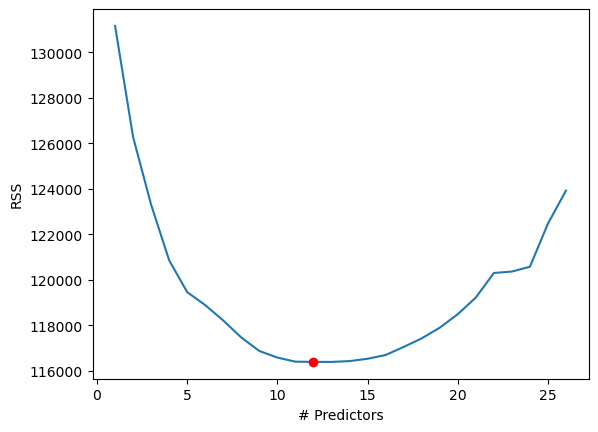

In [19]:
plt.plot(models_train["RSS"])
plt.xlabel('# Predictors')
plt.ylabel('RSS')
plt.plot(pd.to_numeric(models_train["RSS"]).argmin(), models_train["RSS"].min(), "or")

In [20]:
models_test = pd.DataFrame(columns=["RSS", "model"])

predictors = []

for i in range(1,13):    
    models_test.loc[i] = forward(predictors, X[test], y[test], X[test], y[test])
    predictors = models_test.loc[i]["model"].model.exog_names

In [21]:
print(models_train.loc[12, "model"].model.exog_names)
print(models_test.loc[12, "model"].model.exog_names)

['s_apq11', 'HTN', 'j_local_abs', 'NTH', 'j_rap', 's_local_db', 'degree_vb', 'num_periods', 'frac_LUF', 'num_pulses', 's_dda', 'AC']
['s_apq11', 'HTN', 'j_local_abs', 'degree_vb', 'NTH', 'j_rap', 's_local_db', 'num_periods', 'frac_LUF', 's_apq3', 's_local', 'num_vb']


In [22]:
print('----------------------------------------------------------------------------------------------------------')
print('-------------------------------------------Train Data-----------------------------------------------------')
print('----------------------------------------------------------------------------------------------------------')
print(models_train.loc[12, "model"].summary())
print('----------------------------------------------------------------------------------------------------------')
print('--------------------------------------------Test Data-----------------------------------------------------')
print('----------------------------------------------------------------------------------------------------------')
print(models_test.loc[12, "model"].summary())

----------------------------------------------------------------------------------------------------------
-------------------------------------------Train Data-----------------------------------------------------
----------------------------------------------------------------------------------------------------------
                                 OLS Regression Results                                
Dep. Variable:                  UPDRS   R-squared (uncentered):                   0.470
Model:                            OLS   Adj. R-squared (uncentered):              0.458
Method:                 Least Squares   F-statistic:                              36.93
Date:                Sat, 27 May 2023   Prob (F-statistic):                    2.70e-61
Time:                        01:54:31   Log-Likelihood:                         -2112.9
No. Observations:                 511   AIC:                                      4250.
Df Residuals:                     499   BIC:                   

In [50]:
from sklearn.metrics import mean_squared_error

models_test = pd.DataFrame(columns=["RSS", "model"])

predictors = []

for i in range(1, 13):    
    models_test.loc[i] = forward(predictors, X[test], y[test], X[test], y[test])
    predictors = models_test.loc[i]["model"].model.exog_names

best_model_test = models_test.loc[12, "model"]

y_pred_test = best_model_test.predict(X[test][best_model_test.model.exog_names])  # Predict using the best model on testing data
mse_test = ((y_pred_test - y[test]) ** 2).sum() / len(y[test])  # Calculate MSE for testing data

print("MSE on testing data:", mse_test)  # Print MSE for testing data

MSE on testing data: 214.25959206872915


## Backward Selection

In [92]:
# Backward selection for feature selection
selected_features = list(X_train.columns)  # Start with all features

while len(selected_features) > 0:
    X_train_selected = X_train[selected_features]
    
    
    # Train MLR model
    model = sm.OLS(y_train, X_train_selected)
    results = model.fit()
    
    # Obtain p-values for all features
    p_values = results.pvalues[1:]  # Exclude the constant term
    
    # Identify the feature with the highest p-value
    max_p_value_feature = p_values.idxmax()
    max_p_value = p_values[max_p_value_feature]
    
    # Check if the highest p-value is above a certain threshold (e.g., 0.05)
    if max_p_value > 0.05:
        selected_features.remove(max_p_value_feature)
    else:
        break

In [93]:
from sklearn.metrics import mean_squared_error

# Train the final MLR model with selected features
final_model = sm.OLS(y_train, X_train[selected_features]).fit()

# Evaluate the final model on test set
X_test_selected = X_test[selected_features]
y_pred_final = final_model.predict(X_test_selected)
mse_final = mean_squared_error(y_test, y_pred_final)

In [94]:
# Print the summary of the final model
print(final_model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  UPDRS   R-squared (uncentered):                   0.471
Model:                            OLS   Adj. R-squared (uncentered):              0.466
Method:                 Least Squares   F-statistic:                              104.8
Date:                Sat, 27 May 2023   Prob (F-statistic):                   1.76e-109
Time:                        07:19:12   Log-Likelihood:                         -3435.4
No. Observations:                 832   AIC:                                      6885.
Df Residuals:                     825   BIC:                                      6918.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [95]:
# Fit the final model on the testing data
final_model_test = sm.OLS(y_test, X_test_selected).fit()

# Print the summary of the final model using testing data
print(final_model_test.summary())

                                 OLS Regression Results                                
Dep. Variable:                  UPDRS   R-squared (uncentered):                   0.454
Model:                            OLS   Adj. R-squared (uncentered):              0.435
Method:                 Least Squares   F-statistic:                              23.87
Date:                Sat, 27 May 2023   Prob (F-statistic):                    1.77e-23
Time:                        07:19:14   Log-Likelihood:                         -855.26
No. Observations:                 208   AIC:                                      1725.
Df Residuals:                     201   BIC:                                      1748.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [96]:
print("MSE of the final model:", mse_final)

MSE of the final model: 220.8177361989422
